In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
# Carregando o arquivo CSV
frame = pd.read_csv('calcular.csv')


In [3]:
# Exibindo os dados carregados
frame


,X,Y
0,1,2
1,3,4
2,5,6
3,7,8


In [4]:
# Recebendo o total de valores da coluna de dados
size = frame.shape[0]


In [5]:
# Obtendo Xbarra e Ybarra
mediaX = frame['X'].sum() / size
mediaY = frame['Y'].sum() / size

In [6]:
# Completa a Tabela (Xi – Xbarra) e (Yi – Ybarra)
for cont in range(size):
    frame.loc[cont, '(Xi – Xbarra)']                   = frame.loc[cont, 'X'] - mediaX
    frame.loc[cont, '(Yi – Ybarra)']                   = frame.loc[cont, 'Y'] - mediaY
    frame.loc[cont, '(Xi – Xbarra)*(Yi – Ybarra)']     = frame.loc[cont, '(Xi – Xbarra)'] * frame.loc[cont, '(Yi – Ybarra)']
    frame.loc[cont, '(Xi – Xbarra)²']                  = frame.loc[cont, '(Xi – Xbarra)'] ** 2
    frame.loc[cont, '(Yi – Ybarra)²']                  = frame.loc[cont, '(Yi – Ybarra)'] ** 2
    frame.loc[cont, '(Xi – Xbarra)² * (Yi – Ybarra)²'] = frame.loc[cont, '(Xi – Xbarra)²'] * frame.loc[cont, '(Yi – Ybarra)²']


In [7]:
# Soma dos resultados das tabelas para calcular a Correlação da reta
somaXxY = frame['(Xi – Xbarra)*(Yi – Ybarra)'].sum()
somaX2  = frame['(Xi – Xbarra)²'].sum()
somaY2  = frame['(Yi – Ybarra)²'].sum()
X2xY2   = somaX2 * somaY2


In [8]:
# Impressão dos valores e suas somas 
print('Soma do total (Xi – Xbarra)*(Yi – Ybarra)     : ', somaXxY)
print('Soma do total (Xi – Xbarra)²                  : ', somaX2)
print('Soma do total (Yi – Ybarra)²                  : ', somaY2)
print('Soma do total (Xi – Xbarra)² * (Yi – Ybarra)² : ', X2xY2)


Soma do total (Xi – Xbarra)*(Yi – Ybarra)     :  20.0
Soma do total (Xi – Xbarra)²                  :  20.0
Soma do total (Yi – Ybarra)²                  :  20.0
Soma do total (Xi – Xbarra)² * (Yi – Ybarra)² :  400.0


In [9]:
# Cálculo da Correlação da Reta e sua impressão
Corr = somaXxY / math.sqrt(X2xY2)
print('Correlação da reta é: ', Corr)


Correlação da reta é:  1.0


In [10]:
# Insere a soma para fazer a correlação na tabela CSV
frame.loc[size + 1, '(Xi – Xbarra)*(Yi – Ybarra)']     = somaXxY
frame.loc[size + 1, '(Xi – Xbarra)²']                  = somaX2
frame.loc[size + 1, '(Yi – Ybarra)²']                  = somaY2
frame.loc[size + 1, '(Xi – Xbarra)² * (Yi – Ybarra)²'] = X2xY2
frame.loc[size + 1, 'Correlação']                      = Corr


In [11]:
# Exibindo a tabela final
frame


,X,Y,(Xi – Xbarra),(Yi – Ybarra),(Xi – Xbarra)*(Yi – Ybarra),(Xi – Xbarra)²,(Yi – Ybarra)²,(Xi – Xbarra)² * (Yi – Ybarra)²,Correlação
0,1.0,2.0,-3.0,-3.0,9.0,9.0,9.0,81.0,NaN
1,3.0,4.0,-1.0,-1.0,1.0,1.0,1.0,1.0,NaN
2,5.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,7.0,8.0,3.0,3.0,9.0,9.0,9.0,81.0,NaN
5,NaN,NaN,NaN,NaN,20.0,20.0,20.0,400.0,1.0


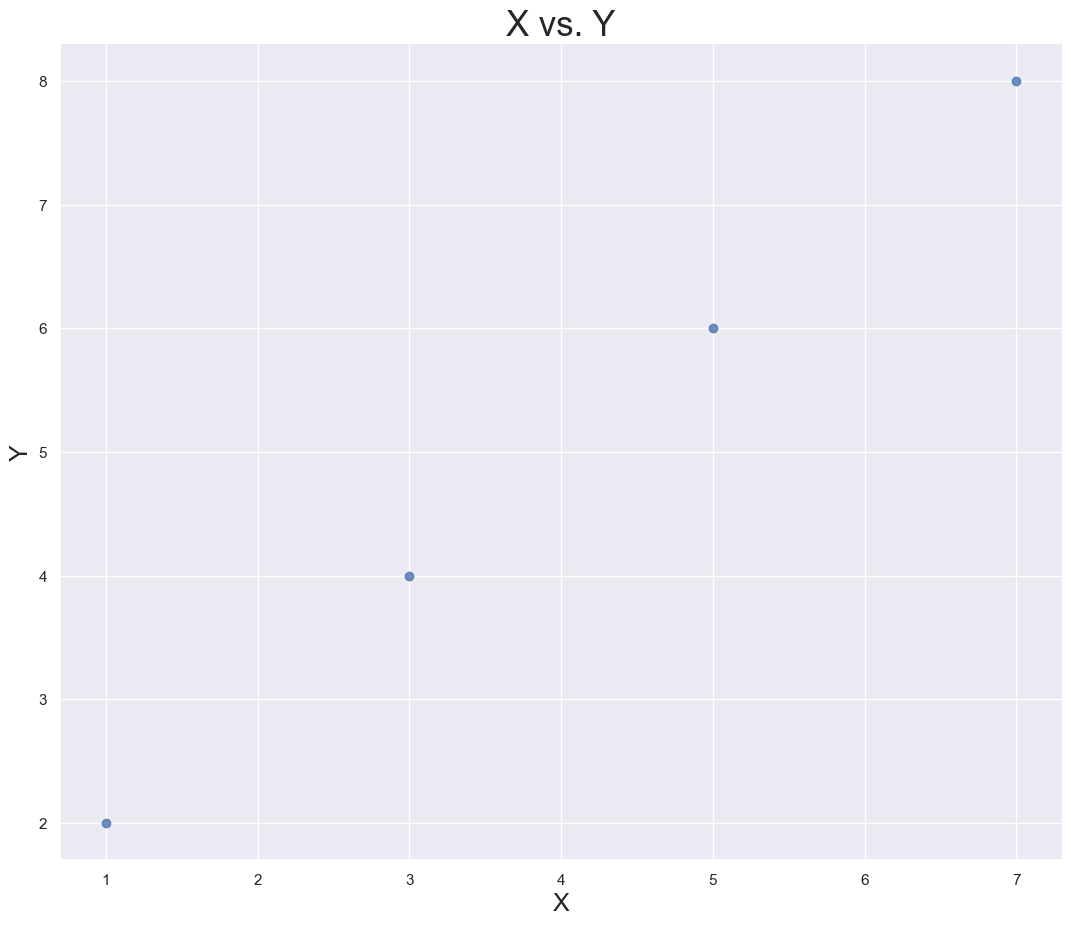

In [12]:
# Plotando o gráfico
sb.set()
AttvTot = sb.lmplot(x='X', y='Y', data=frame, fit_reg=False, height=9, aspect=1.2)  # 'size' substituído por 'height'
plt.ylim()
plt.xlim()
plt.title('X vs. Y', fontsize=25)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
AttvTot.savefig("image.png")


In [13]:
# Salvando a tabela final em um arquivo CSV
frame.to_csv('solucao.csv')
